# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [131]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [89]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [90]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [91]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [92]:
boston_df['MEDV'] = boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [93]:
boston_df.describe()

CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

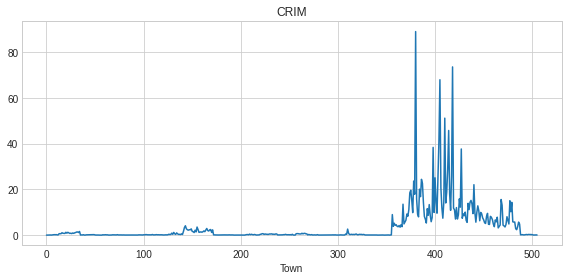

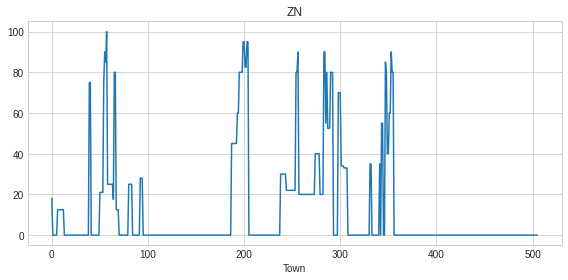

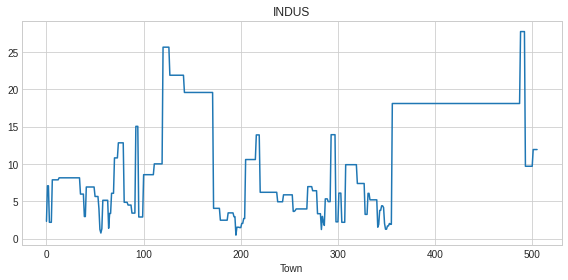

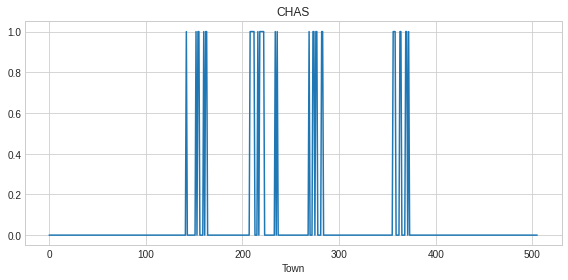

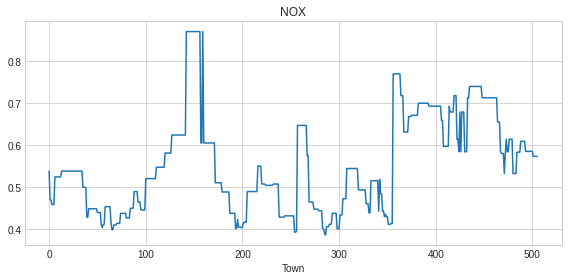

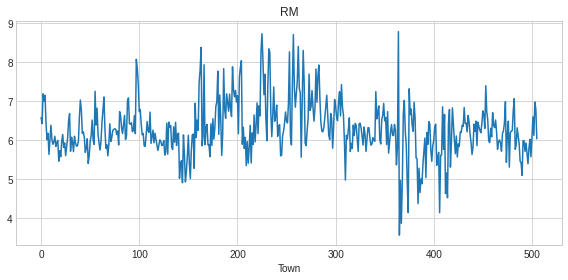

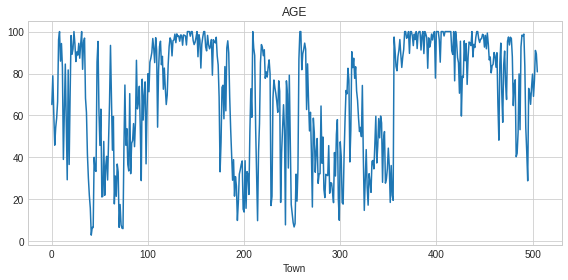

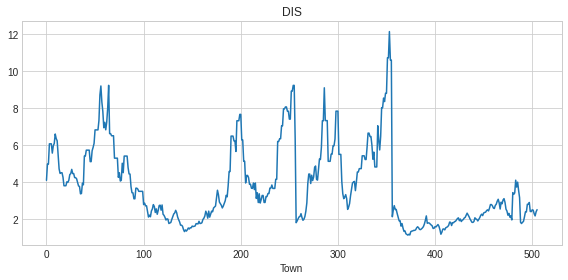

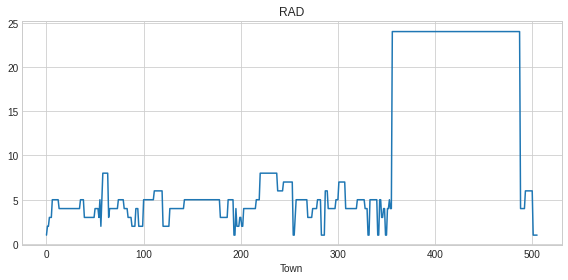

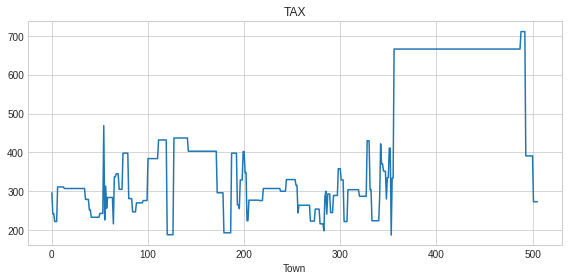

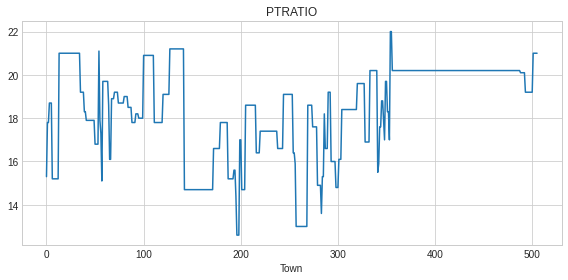

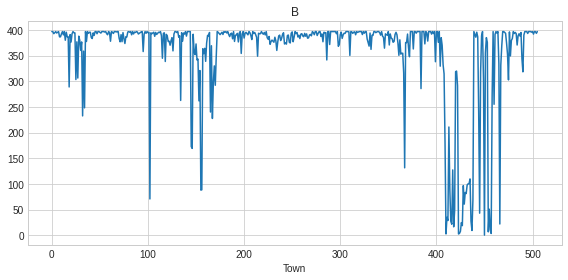

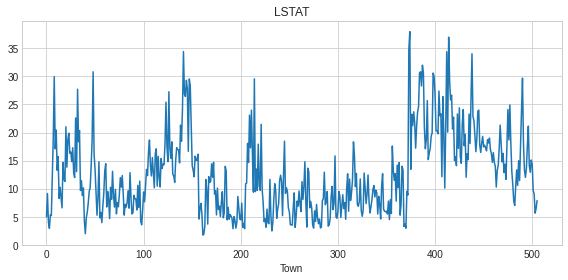

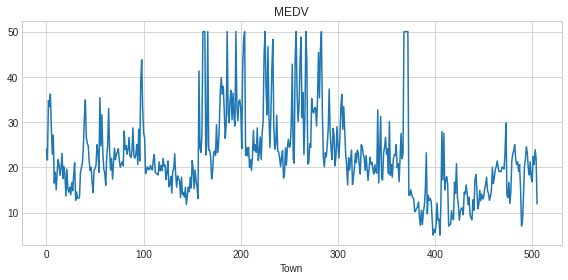

In [94]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('Town')
    plt.tight_layout()

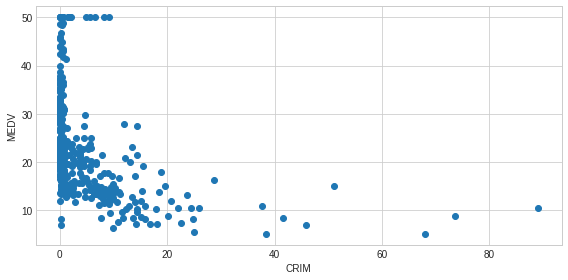

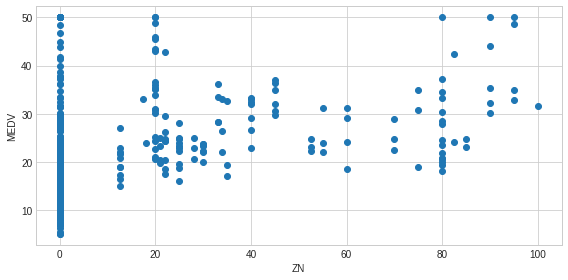

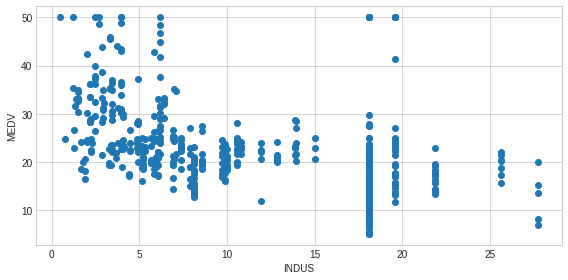

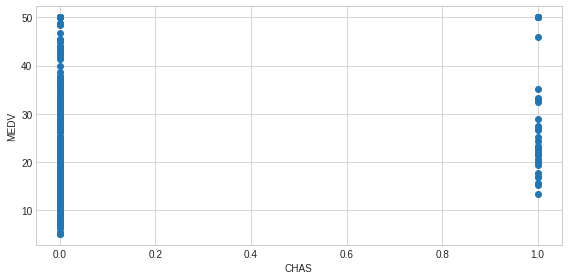

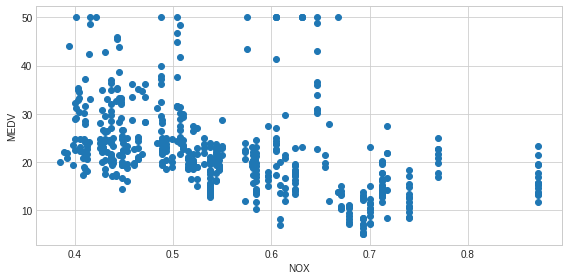

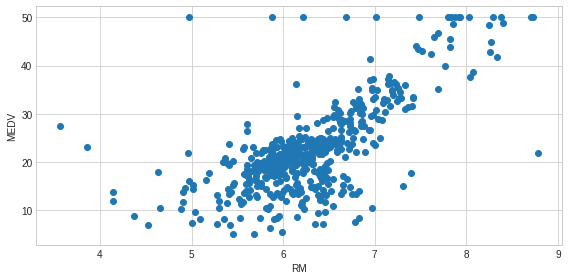

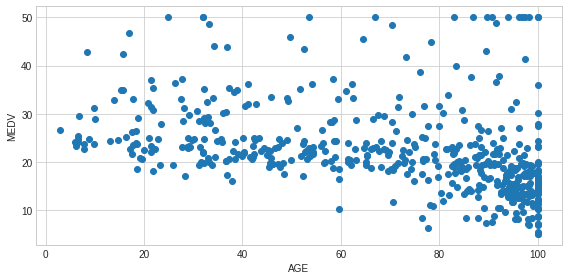

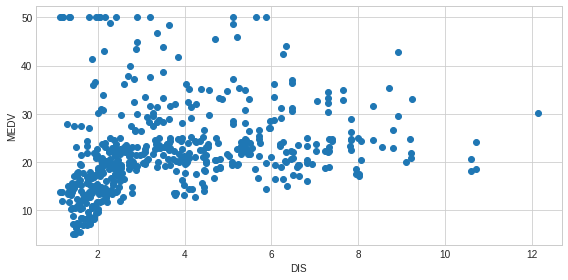

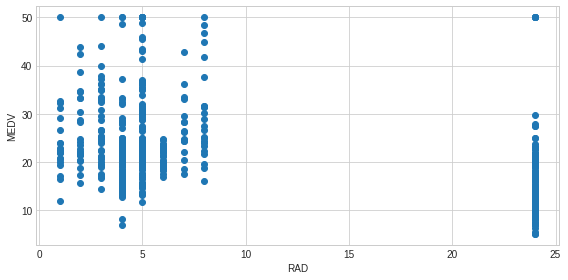

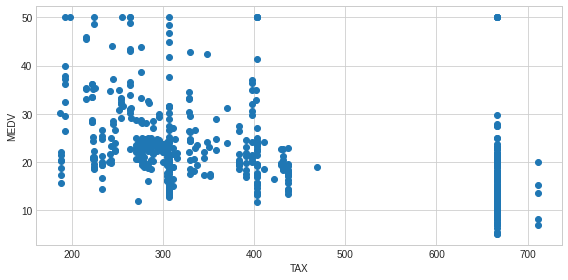

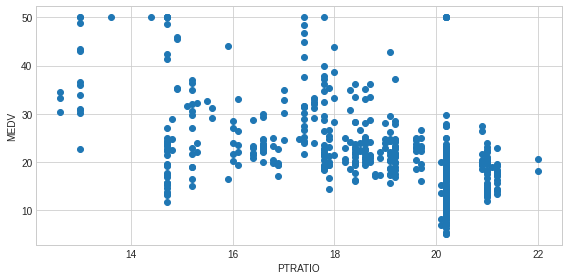

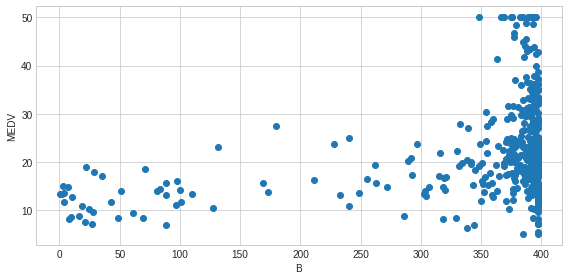

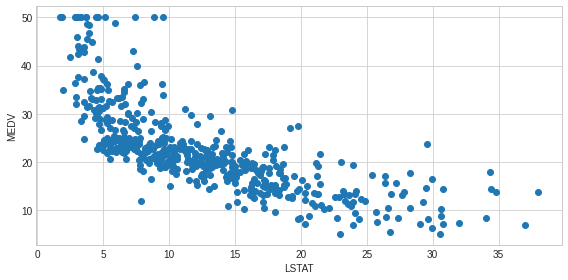

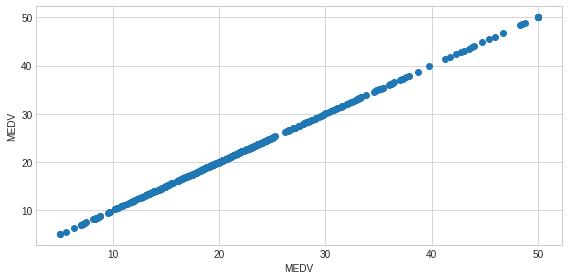

In [95]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.scatter(boston_df[col], boston_df['MEDV'])
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.tight_layout()

In [96]:
import seaborn as sns

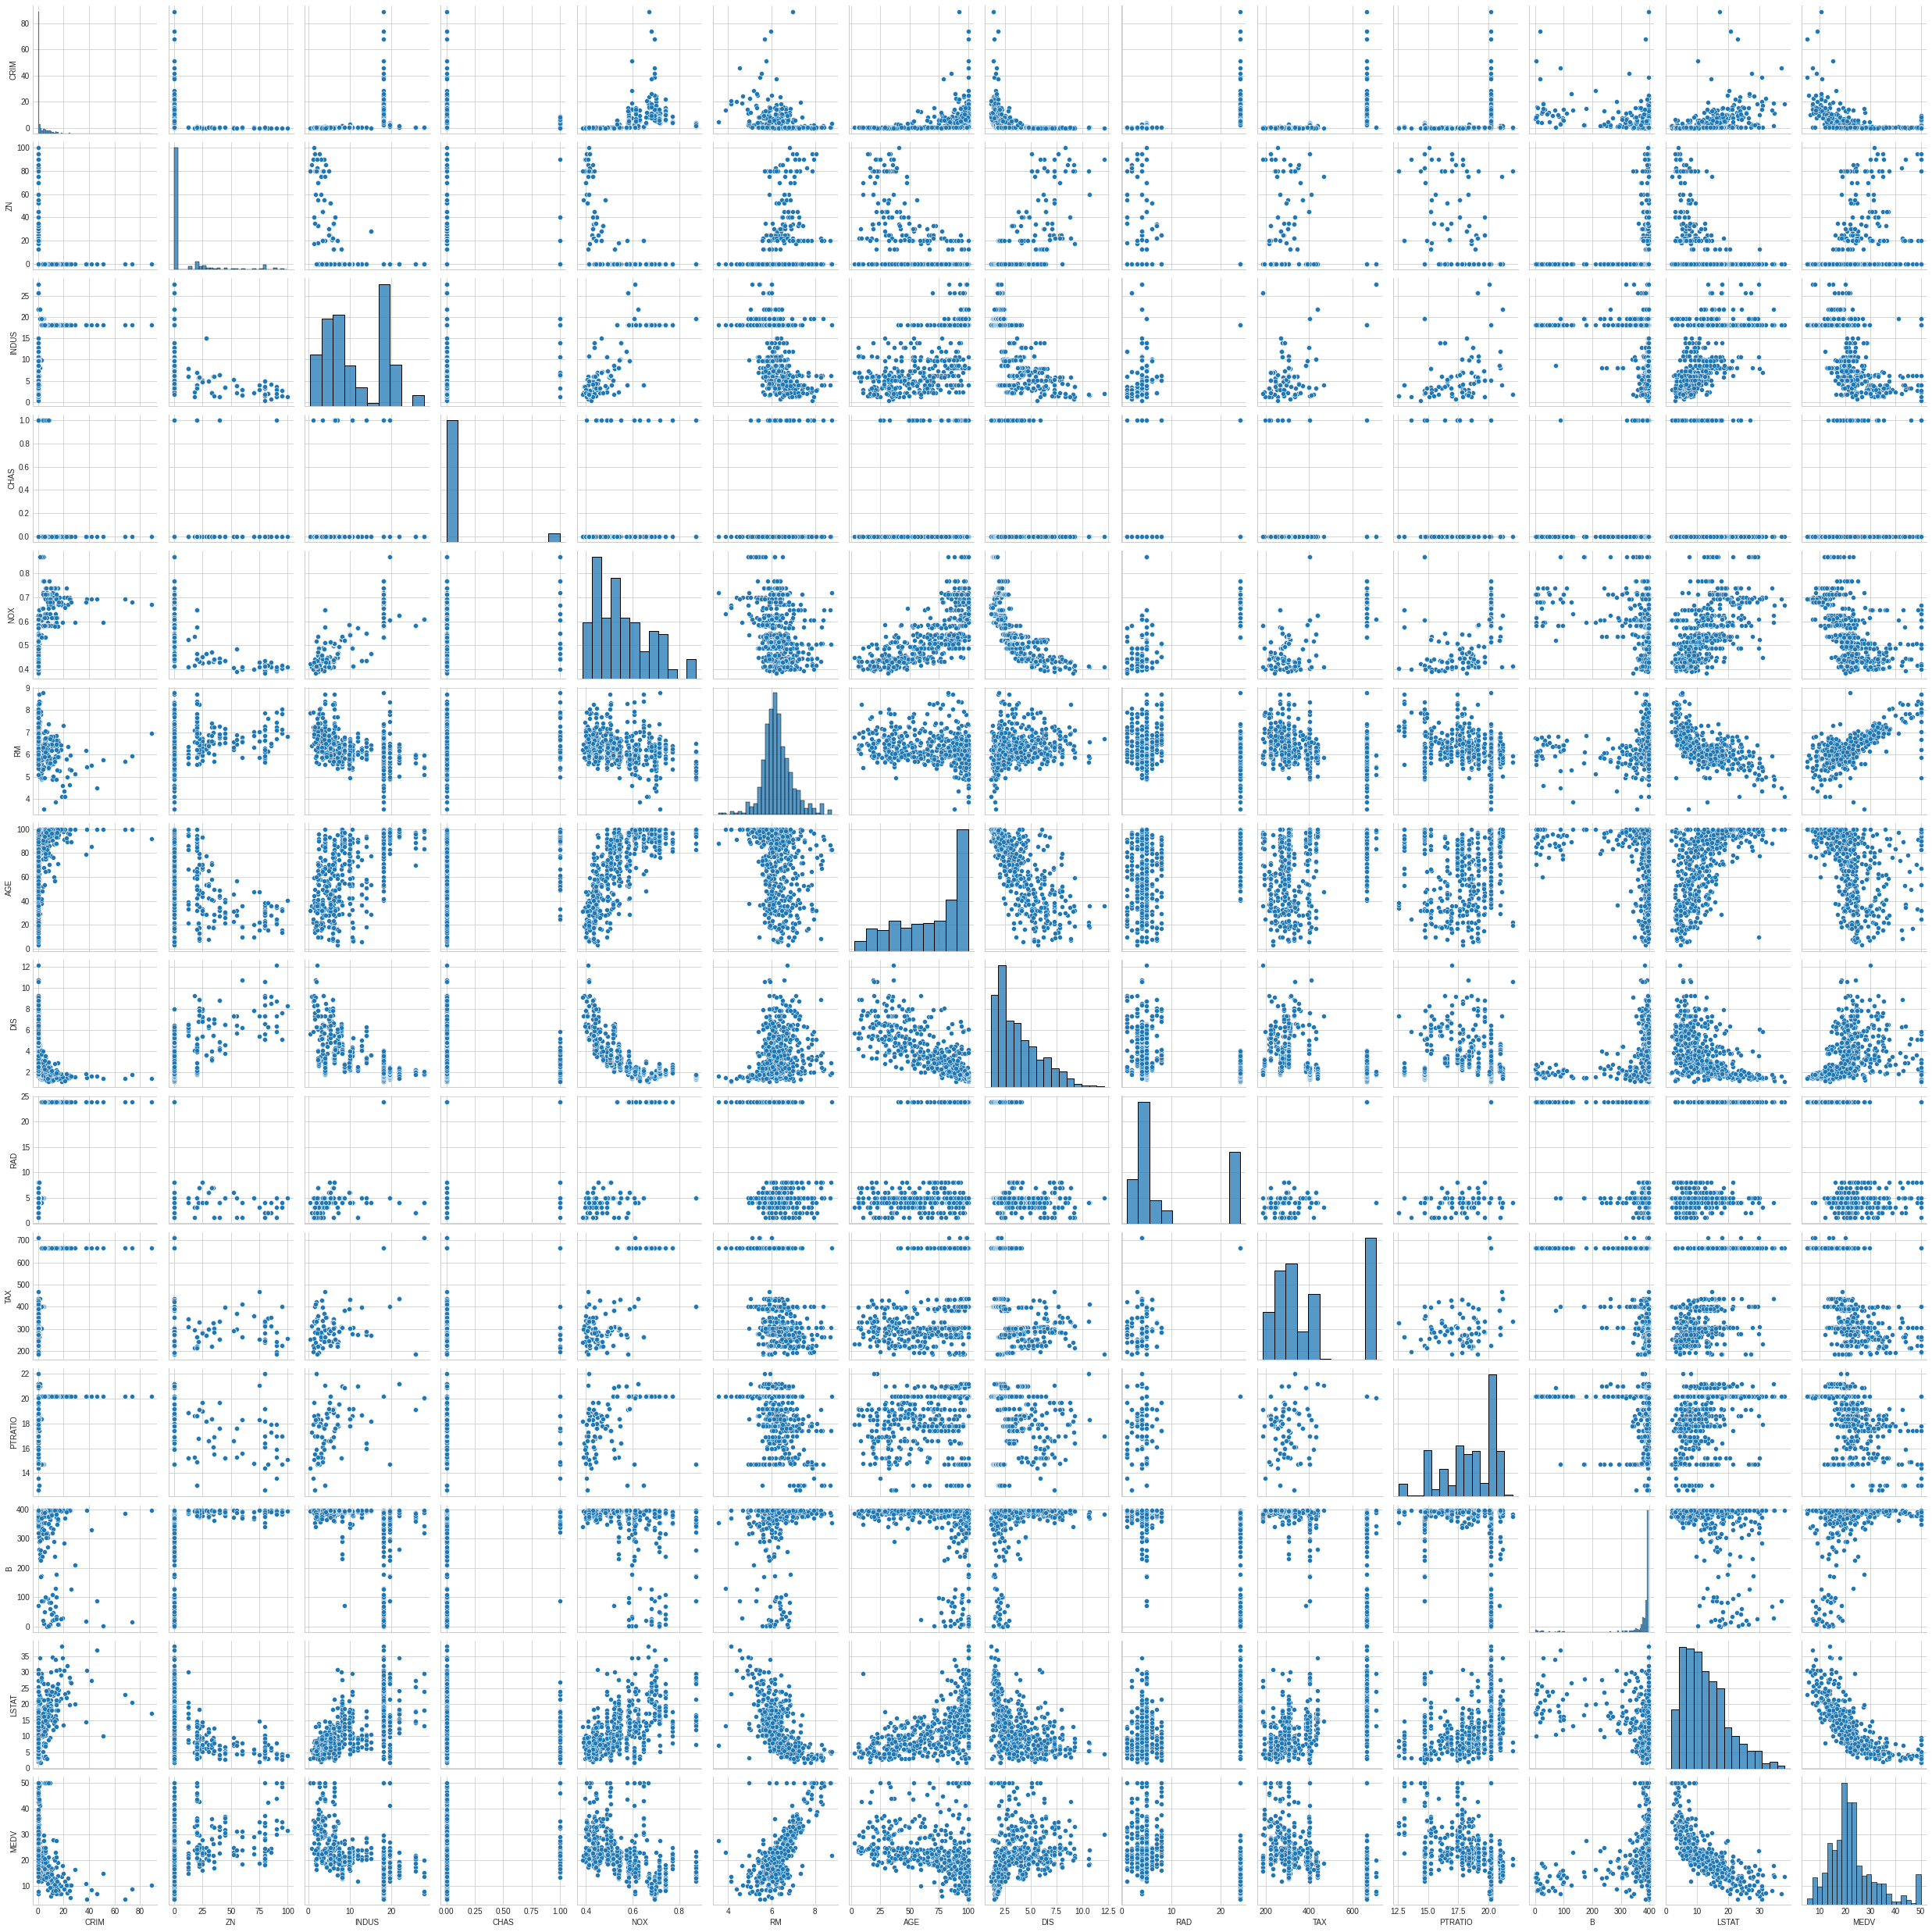

In [97]:
sns.pairplot(boston_df)

### Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=.2)

In [100]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [101]:
print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

Training score: 0.7417438456203844
Test score: 0.7294443616055807


In [102]:
# Try cross validation as the sample size is small

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
print('NMSW: {}'.format(scores))
print('NMSW mean: {}'.format(scores.mean()))
print('NMSW std: {}'.format(scores.std()))

NMSW: [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSW mean: -34.70525594452485
NMSW std: 45.57399920030876


In [103]:
# Coefficient of determination (r2)
# to see model training efficiency

r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')
print('R2 scores: {}'.format(r2_scores))
print('R2 scores mean: {}'.format(r2_scores.mean()))
print('R2 scores std: {}'.format(r2_scores.std()))

R2 scores: [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean: 0.20252899006056363
R2 scores std: 0.5952960169512287


In [104]:
# For linear Regression, need intercept and coef

print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y = 35.69804447191544 
-0.0943219515876226 * x0
0.0456177336297343 * x1
0.0047763893462416055 * x2
3.4369215438303313 * x3
-15.708415015932307 * x4
3.6100456448947207 * x5
-0.0045776535928595385 * x6
-1.3884751910609858 * x7
0.28982678739282897 * x8
-0.011179486209510123 * x9
-0.9442631253449071 * x10
0.010501604637066134 * x11
-0.515336175578172 * x12


In [105]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 score: {}'.format(r2))

RMSE: 4.673723121916249
R2 score: 0.7417438456203844


In [106]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 score: {}'.format(r2))

RMSE: 4.757609923064406
R2 score: 0.7294443616055807


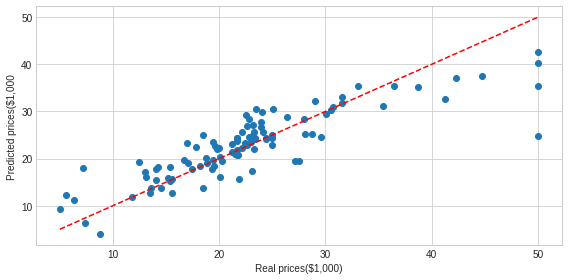

In [107]:
def plot_boston_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5, 50], [5, 50], '--r')
    plt.xlabel('Real prices($1,000)')
    plt.ylabel('Predicted prices($1,000')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [108]:
from sklearn.datasets import fetch_california_housing

calif = fetch_california_housing()

In [109]:
calif.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [110]:
print(calif.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [111]:
calif_df = pd.DataFrame(calif.data, columns=calif.feature_names)
calif_df['Target'] = calif.target
calif_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Target
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23   4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22   3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24   3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25   3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25   3.422

[5 rows x 9 columns]

In [112]:
calif_df.describe()

MedInc      HouseAge  ...     Longitude        Target
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]

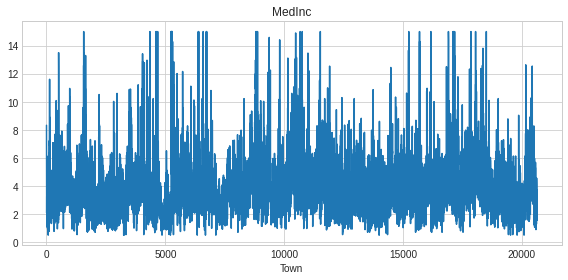

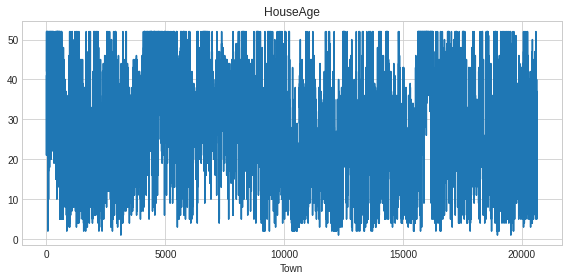

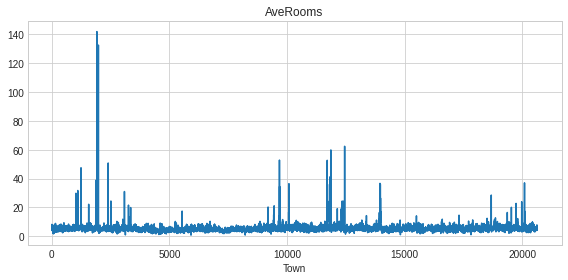

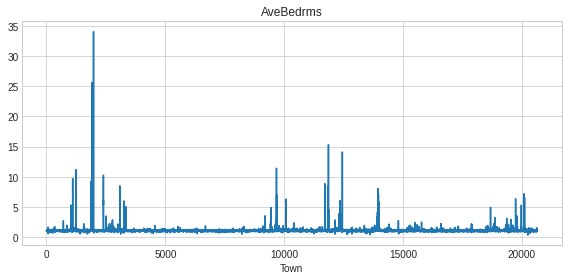

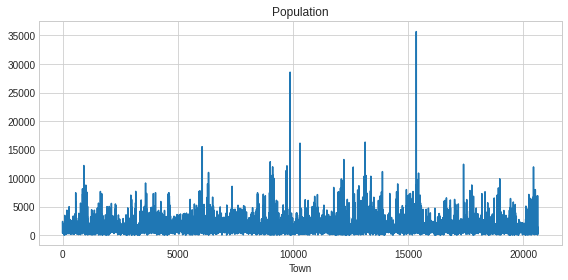

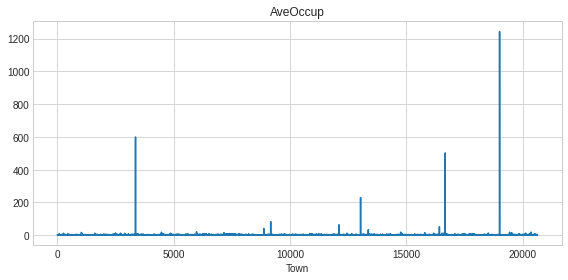

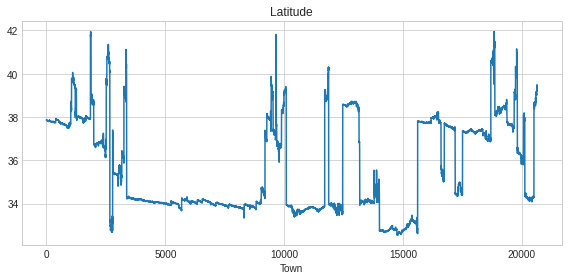

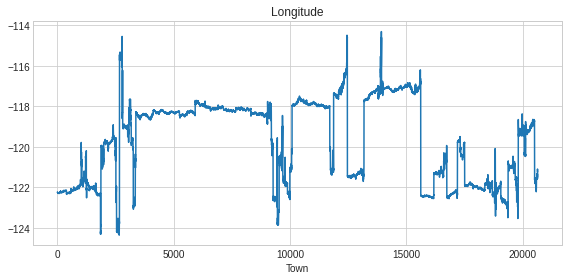

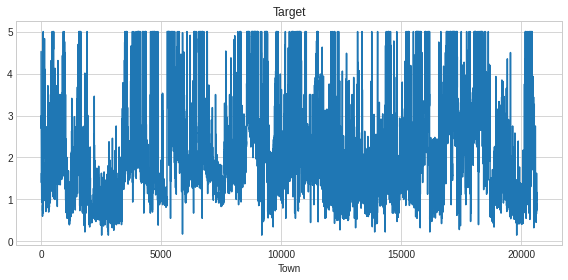

In [113]:
for i, col in enumerate(calif_df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(calif_df[col])
    plt.title(col)
    plt.xlabel('Town')
    plt.tight_layout()

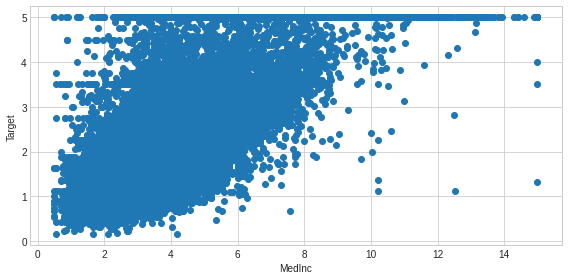

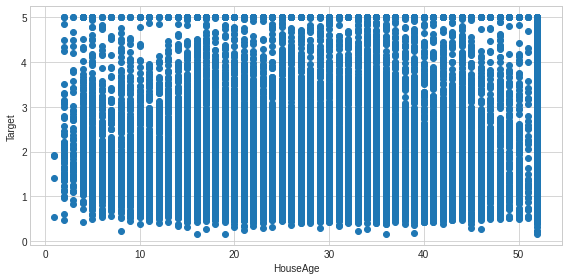

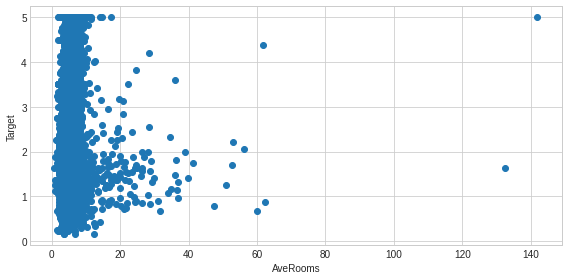

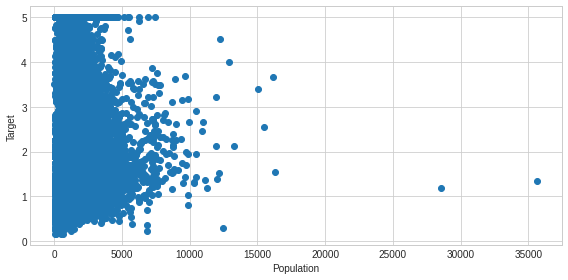

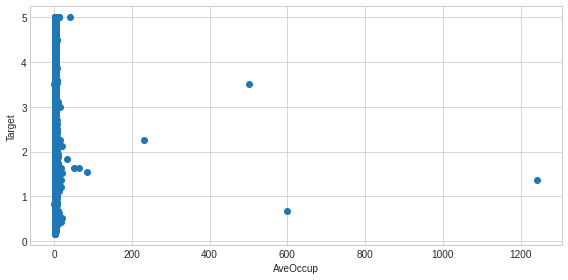

In [114]:
for i, col in enumerate(calif_df.columns[: -3]):
    plt.figure(figsize=(8,4))
    plt.scatter(calif_df[col], calif_df['Target'])
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.tight_layout()

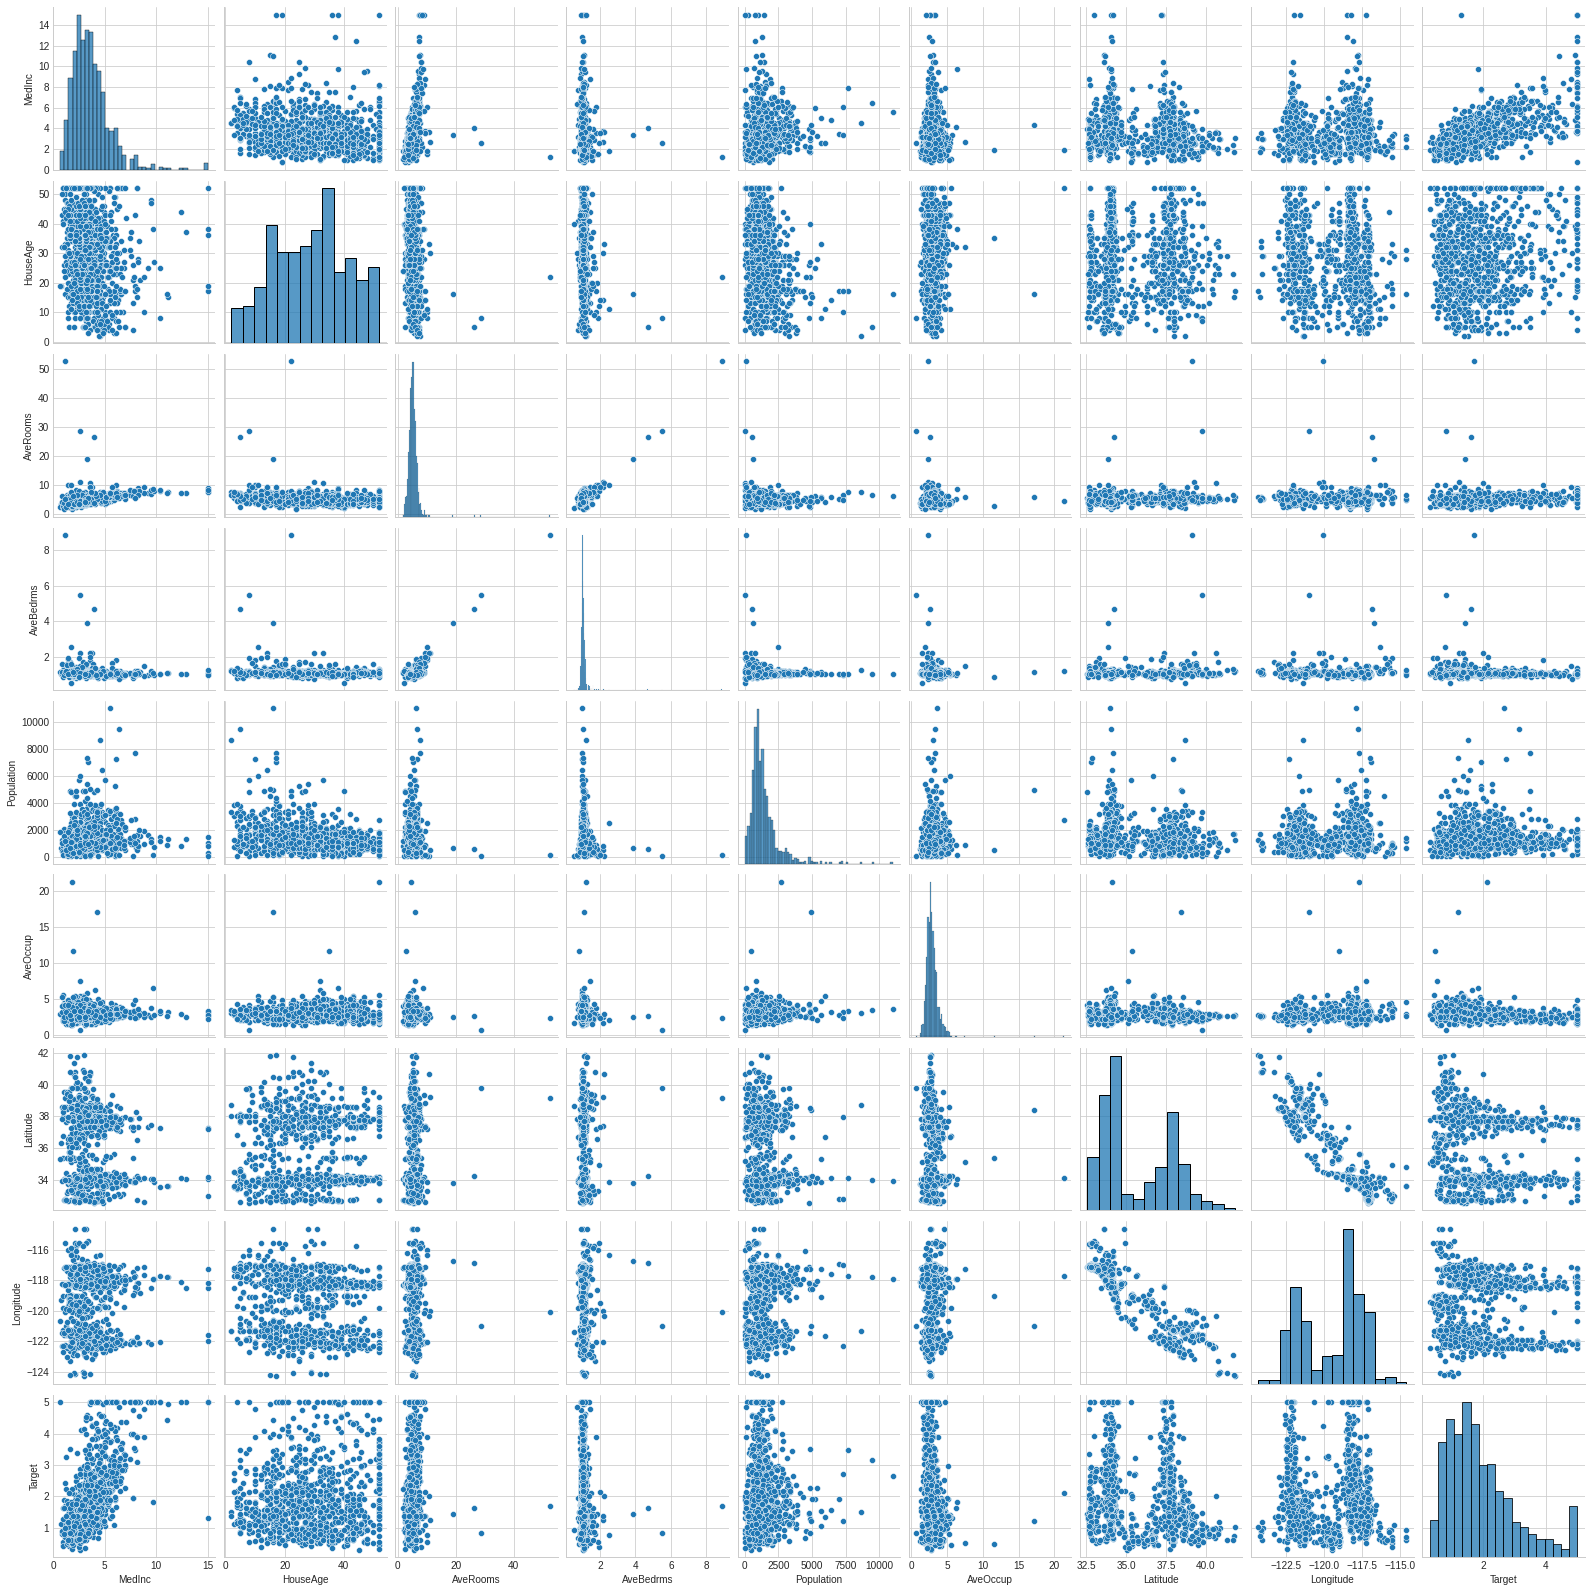

In [115]:
sns.pairplot(calif_df.sample(1000))

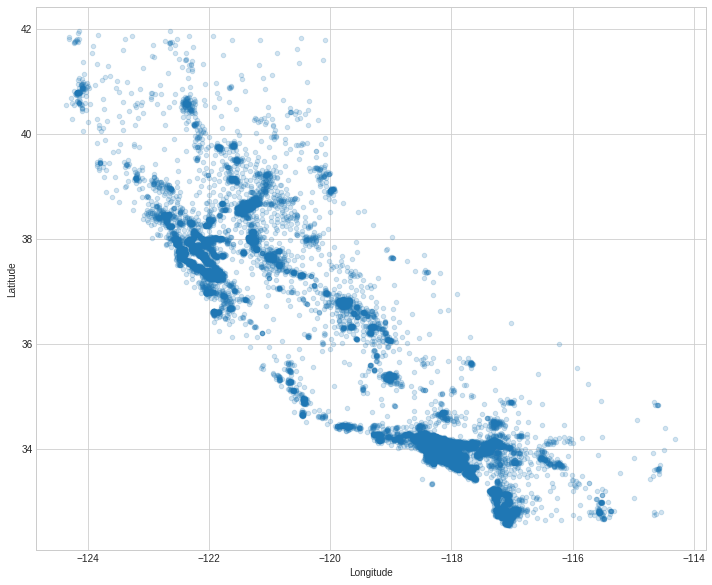

In [116]:
calif_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10))

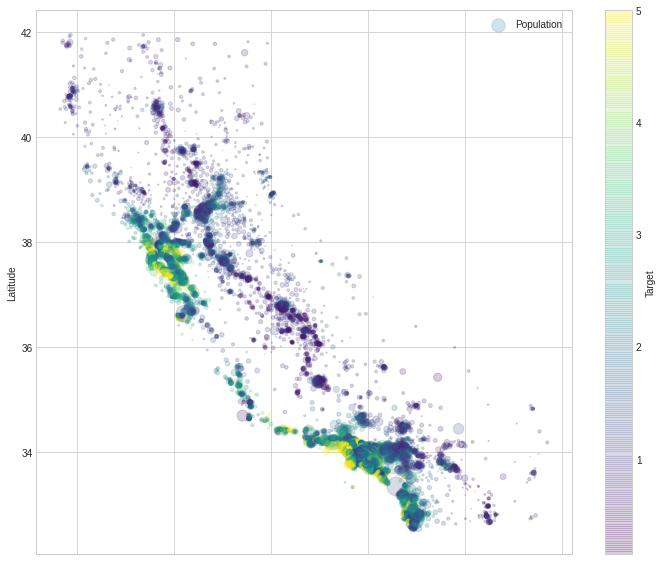

In [117]:
calif_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10), s=calif_df['Population']/100, label='Population', c='Target', cmap=plt.get_cmap('viridis'), colorbar=True)

In [118]:
model = LinearRegression(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(calif.data, calif.target, test_size=.2)
model.fit(X_train, y_train)

print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

Training score: 0.6033972944402998
Test score: 0.6165611338410022


In [119]:
scores = cross_val_score(model, calif.data, calif.target, cv=10, scoring='neg_mean_squared_error')

print('NMSW: {}'.format(scores))
print('NMSW mean: {}'.format(scores.mean()))
print('NMSW std: {}'.format(scores.std()))

NMSW: [-0.48922052 -0.43335865 -0.8864377  -0.39091641 -0.7479731  -0.52980278
 -0.28798456 -0.77326441 -0.64305557 -0.3275106 ]
NMSW mean: -0.5509524296956643
NMSW std: 0.19288582953865113


In [120]:
r2_scores = cross_val_score(model, calif.data, calif.target, cv=10, scoring='r2')
print('R2 scores: {}'.format(r2_scores))
print('R2 scores mean: {}'.format(r2_scores.mean()))
print('R2 scores std: {}'.format(r2_scores.std()))

R2 scores: [0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
R2 scores mean: 0.5110068610523768
R2 scores std: 0.05928861371262407


In [121]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y = -37.24968719570676 
0.4302013746889136 * x0
0.009161101453244658 * x1
-0.09996537186764998 * x2
0.6021078404690038 * x3
-2.347925148236063e-06 * x4
-0.004837931312261859 * x5
-0.42713350583839166 * x6
-0.43914134575199715 * x7


In [122]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 score: {}'.format(r2))

RMSE: 0.7265513675269412
R2 score: 0.6033972944402998


In [123]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 score: {}'.format(r2))

RMSE: 0.7150383079922468
R2 score: 0.6165611338410022


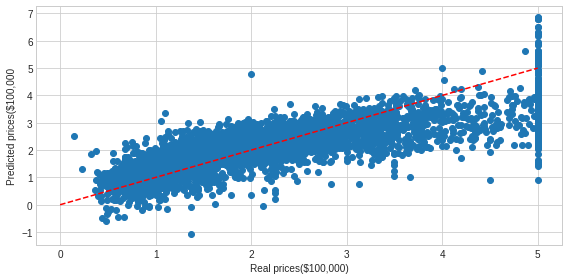

In [124]:
def plot_calif_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([0, 5], [0, 5], '--r')
    plt.xlabel('Real prices($100,000)')
    plt.ylabel('Predicted prices($100,000')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_calif_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

In [125]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [126]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [132]:
model = Ridge(alpha=.2)
model.fit(X_train, y_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [133]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.7331330553566442
test score: 0.7593293251764284


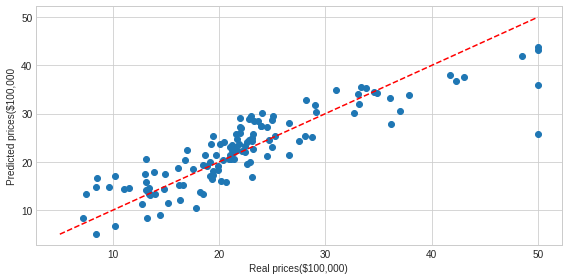

In [135]:
def plot_boston_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5, 50], [5, 50], '--r')
    plt.xlabel('Real prices($100,000)')
    plt.ylabel('Predicted prices($100,000')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

In [136]:
# California housing price with Ridge 

from sklearn.datasets import fetch_california_housing

calif = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(calif.data, calif.target, test_size=.2)

In [137]:
model = Ridge(alpha=.2)
model.fit(X_train, y_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [138]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.6050709590840884
test score: 0.6107746986063117


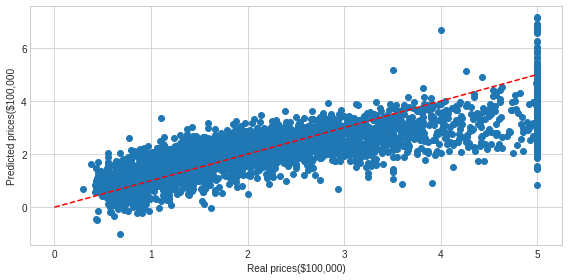

In [140]:
def plot_calif_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([0, 5], [0, 5], '--r')
    plt.xlabel('Real prices($100,000)')
    plt.ylabel('Predicted prices($100,000')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_calif_prices(expected, predicted)

## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

In [143]:
from sklearn.linear_model import Lasso

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [144]:
model = Lasso(alpha=.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [145]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.7303294411351855
test score: 0.7410016349713325


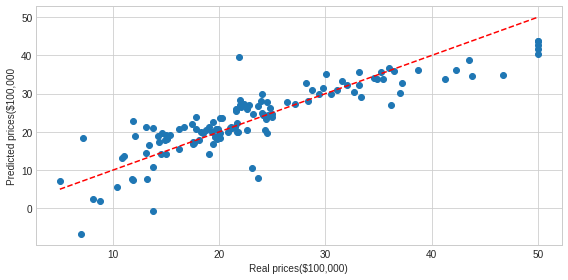

In [146]:
def plot_boston_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5, 50], [5, 50], '--r')
    plt.xlabel('Real prices($100,000)')
    plt.ylabel('Predicted prices($100,000')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

In [147]:
from sklearn.datasets import fetch_california_housing

calif = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(calif.data, calif.target, test_size=.2) 

In [148]:
model = Lasso(alpha=.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [149]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.606852122342875
test score: 0.6026079556020854


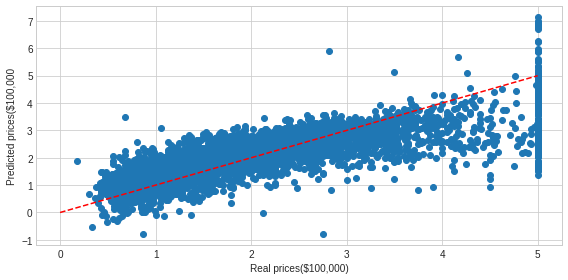

In [150]:
predicted = model.predict(X_test)
expected = y_test

plot_calif_prices(expected, predicted)

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

In [151]:
from sklearn.linear_model import ElasticNet

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [152]:
model = ElasticNet(alpha=.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [153]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.7758339579342033
test score: 0.5707308808464857


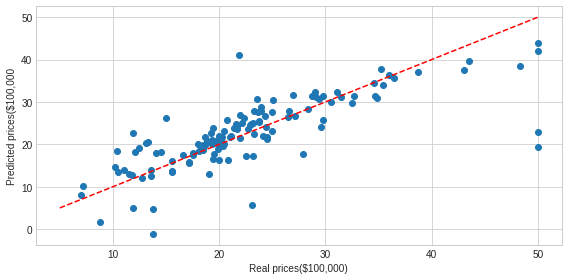

In [154]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

In [155]:
# California housing

calif = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(calif.data, calif.target, test_size=.2) 

model = ElasticNet(alpha=.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [156]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.6045852542477197
test score: 0.6022630802405671


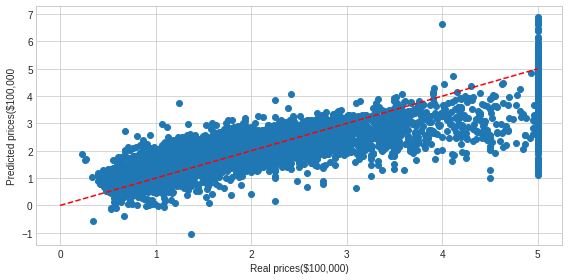

In [157]:
predicted = model.predict(X_test)
expected = y_test

plot_calif_prices(expected, predicted)

## 직교 정합 추구 (Orthogonal Matching Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

In [158]:
from sklearn.linear_model import OrthogonalMatchingPursuit

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [159]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=7, normalize=True,
                          precompute='auto', tol=None)

In [160]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.7268524843564474
test score: 0.7040166195411197


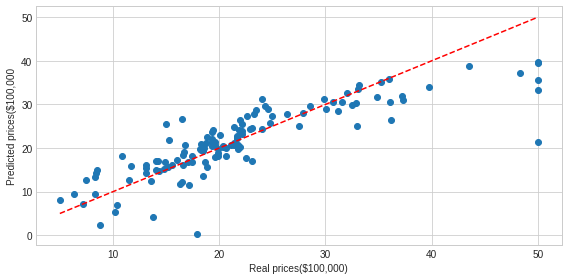

In [161]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

In [162]:
# California housing

calif = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(calif.data, calif.target, test_size=.2) 

model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=5, normalize=True,
                          precompute='auto', tol=None)

In [163]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.5996221142661347
test score: 0.5956176482131188


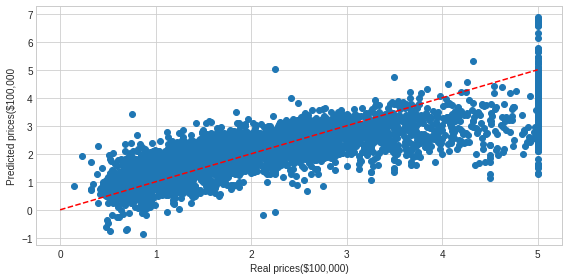

In [165]:
predicted = model.predict(X_test)
expected = y_test

plot_calif_prices(expected, predicted)

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


In [167]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [168]:
model = make_pipeline(PolynomialFeatures(degree=2),
                      StandardScaler(),
                      LinearRegression()
                      )
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [169]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.9346787783950696
test score: 0.825786471800239


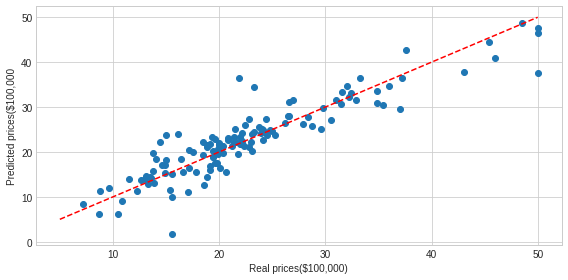

In [170]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

In [171]:
# California housing

calif = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(calif.data, calif.target, test_size=.2) 

model = make_pipeline(PolynomialFeatures(degree=2),
                      StandardScaler(),
                      LinearRegression()
                      )
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [172]:
print('Train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Train score: 0.6817111055277044
test score: 0.6848307178429949


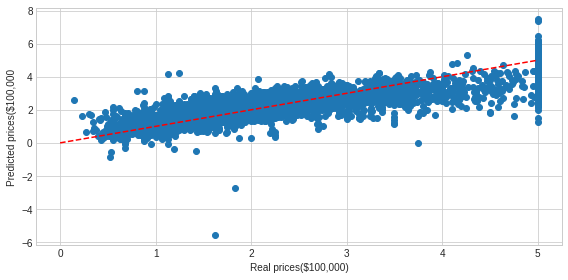

In [173]:
predicted = model.predict(X_test)
expected = y_test

plot_calif_prices(expected, predicted)